In [1]:
import pandas as pd
import keras
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os
import cv2
import numpy as np

Using TensorFlow backend.
/home/sezan/anaconda3/envs/carnd-term1/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/sezan/anaconda3/envs/carnd-term1/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/sezan/anaconda3/envs/carnd-term1/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/se

In [2]:
import tensorflow

In [3]:
SEED = 1

In [4]:
DATA_FOLDER = "../data/Simulator/"

In [5]:
normal = os.path.join(DATA_FOLDER,"CenterLaneDriving")
recovery = os.path.join(DATA_FOLDER,"RecoveryLap")
difficult = os.path.join(DATA_FOLDER,"Difficult")

In [6]:
names = ["Center Image","Left Image","Right Image","Steering", "Throttle", "Brake", "Speed"]

In [7]:
normal_driving_log = pd.read_csv(os.path.join(normal,"driving_log.csv"),names = names)

In [8]:
normal_driving_log.head()

,Center Image,Left Image,Right Image,Steering,Throttle,Brake,Speed
0,/home/sezan/Desktop/work/SelfDrivingCarND/data...,/home/sezan/Desktop/work/SelfDrivingCarND/data...,/home/sezan/Desktop/work/SelfDrivingCarND/data...,0.0,0.000000,0,9.892318
1,/home/sezan/Desktop/work/SelfDrivingCarND/data...,/home/sezan/Desktop/work/SelfDrivingCarND/data...,/home/sezan/Desktop/work/SelfDrivingCarND/data...,0.0,0.000000,0,9.811010
2,/home/sezan/Desktop/work/SelfDrivingCarND/data...,/home/sezan/Desktop/work/SelfDrivingCarND/data...,/home/sezan/Desktop/work/SelfDrivingCarND/data...,0.0,0.000000,0,9.750371
3,/home/sezan/Desktop/work/SelfDrivingCarND/data...,/home/sezan/Desktop/work/SelfDrivingCarND/data...,/home/sezan/Desktop/work/SelfDrivingCarND/data...,0.0,0.000000,0,9.670085
4,/home/sezan/Desktop/work/SelfDrivingCarND/data...,/home/sezan/Desktop/work/SelfDrivingCarND/data...,/home/sezan/Desktop/work/SelfDrivingCarND/data...,0.0,0.128493,0,9.627087


<AxesSubplot:>

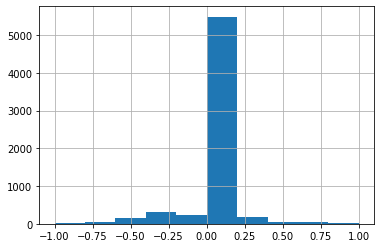

In [9]:
normal_driving_log["Steering"].hist(bins=10)

In [10]:

recovery_driving_log = pd.read_csv(os.path.join(recovery,"driving_log.csv"),names = names)

In [11]:
recovery_driving_log.head()

,Center Image,Left Image,Right Image,Steering,Throttle,Brake,Speed
0,/home/sezan/Desktop/work/SelfDrivingCarND/data...,/home/sezan/Desktop/work/SelfDrivingCarND/data...,/home/sezan/Desktop/work/SelfDrivingCarND/data...,0.0,0.0,0.0,3.034396
1,/home/sezan/Desktop/work/SelfDrivingCarND/data...,/home/sezan/Desktop/work/SelfDrivingCarND/data...,/home/sezan/Desktop/work/SelfDrivingCarND/data...,0.0,0.0,0.0,3.011356
2,/home/sezan/Desktop/work/SelfDrivingCarND/data...,/home/sezan/Desktop/work/SelfDrivingCarND/data...,/home/sezan/Desktop/work/SelfDrivingCarND/data...,0.0,0.0,0.0,2.988503
3,/home/sezan/Desktop/work/SelfDrivingCarND/data...,/home/sezan/Desktop/work/SelfDrivingCarND/data...,/home/sezan/Desktop/work/SelfDrivingCarND/data...,0.0,0.0,0.0,2.971483
4,/home/sezan/Desktop/work/SelfDrivingCarND/data...,/home/sezan/Desktop/work/SelfDrivingCarND/data...,/home/sezan/Desktop/work/SelfDrivingCarND/data...,0.0,0.0,0.0,2.948949


<AxesSubplot:>

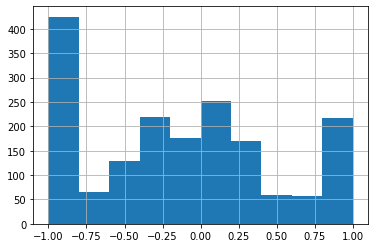

In [12]:
recovery_driving_log[recovery_driving_log["Steering"]!=0.0]["Steering"].hist()

In [13]:
recovery_driving_log = recovery_driving_log[recovery_driving_log["Steering"]!=0.0]

In [14]:
full_driving_log = pd.concat([normal_driving_log,recovery_driving_log])

In [15]:
data = full_driving_log[["Center Image","Steering"]]

In [16]:
data.head()

,Center Image,Steering
0,/home/sezan/Desktop/work/SelfDrivingCarND/data...,0.0
1,/home/sezan/Desktop/work/SelfDrivingCarND/data...,0.0
2,/home/sezan/Desktop/work/SelfDrivingCarND/data...,0.0
3,/home/sezan/Desktop/work/SelfDrivingCarND/data...,0.0
4,/home/sezan/Desktop/work/SelfDrivingCarND/data...,0.0


In [17]:
train,test =train_test_split(data)

<AxesSubplot:>

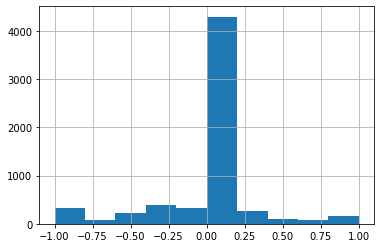

In [18]:
train["Steering"].hist()

<AxesSubplot:>

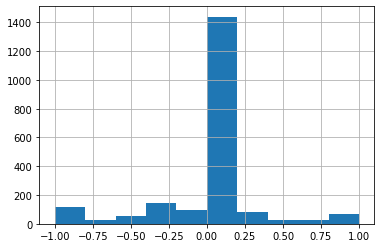

In [19]:
test["Steering"].hist()

In [20]:
np.random.seed(SEED)
from tensorflow import set_random_seed
set_random_seed(SEED)

In [21]:
def resize_image(images,new_size=(128,128)):
    new_image_shape = (images.shape[0],new_size[0],new_size[1],images.shape[3])
    resized_images = np.zeros(shape = new_image_shape)
    for i,image in enumerate(images):
        resized_images[i,:,:,:] = cv2.resize(image,new_size)
    return resized_images

In [22]:
def preprocess(images,new_size=(128,128)):
    images = images[:,60:140,:]
    images = images/255
    images = resize_image(images,new_size)
    return images

In [23]:
def read_images(batch):
    images = [None]*len(batch)
    for i,image_name in enumerate(batch):
        image = cv2.imread(image_name)
        image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
        images[i] = image
    images = np.array(images)
    return images
    

In [24]:
def loader(data,batch_size):
    i = 0
    while True:
        batch = data.iloc[i:i+batch_size]
        batch_image_names = batch["Center Image"].values.tolist()
        batch_images = read_images(batch_image_names)
        steering = batch["Steering"].values.tolist()
        i = i+batch_size
        if i>= len(data):
            i = 0
        yield batch_images,steering
            

In [25]:
from keras.models import Sequential

In [26]:
from keras import layers

In [27]:
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

In [28]:
model = Sequential()
model.add(layers.Lambda(lambda x: x/255.0-0.5, input_shape=(160,320,3)))
model.add(layers.Cropping2D(cropping=((50,20),(0,0))))
model.add(layers.Conv2D(32, (3, 3),strides=(2,2), activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Flatten())
model.add(layers.Dense(1))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(64, (3, 3), activation='relu'))





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [29]:
model.compile(optimizer = keras.optimizers.rmsprop(lr=0.001,rho=0.9),loss = 'mse')

In [30]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_1 (Lambda)            (None, 160, 320, 3)       0         
_________________________________________________________________
cropping2d_1 (Cropping2D)    (None, 90, 320, 3)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 44, 159, 32)       896       
_________________________________________________________________
dropout_1 (Dropout)          (None, 44, 159, 32)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 223872)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 223873    
Total params: 224,769
Trainable params: 224,769
Non-trainable params: 0
_________________________________________________________________


In [31]:
train_loader = loader(train,32)
test_loader = loader(test,32)

In [32]:
history = model.fit_generator(train_loader,steps_per_epoch=len(train)//32,validation_data=test_loader,validation_steps=87,epochs=10,
                              callbacks=[EarlyStopping(monitor='val_loss',patience=5),
                                        ModelCheckpoint('model.h5', save_best_only=True, monitor='val_loss', mode='min')])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Epoch 1/10
194/194 [==============================] - 14s 70ms/step - loss: 9.2828 - val_loss: 0.1055
Epoch 2/10
194/194 [==============================] - 13s 67ms/step - loss: 0.2425 - val_loss: 0.0702
Epoch 3/10
194/194 [==============================] - 13s 68ms/step - loss: 0.1400 - val_loss: 0.0676
Epoch 4/10
194/194 [==============================] - 13s 67ms/step - loss: 0.0550 - val_loss: 0.0706
Epoch 5/10
194/194 [==============================] - 13s 68ms/step - loss: 0.0626 - val_loss: 0.0596
Epoch 6/10
194/194 [==============================] - 13s 67ms/step - loss: 0.0478 - val_loss: 0.0722
Epoch 7/10
194/194 [==============================] - 13s 68ms/step - loss: 0.0391 - val_loss: 0.0713
Epoch 8/10
194/194 [==============================] - 13s 68ms/step - loss: 0.0415 - val_loss: 0.0695
Epoch 9/10
194/194 [==============================] - 13s 68ms/s

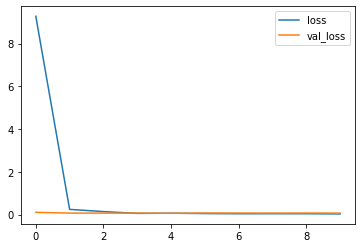

In [33]:
plt.plot(history.history['loss'],label = 'loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.legend()
